Plant Label: Dioscorea delicata

Discoverer: Paul Knuth

Location: Brazil



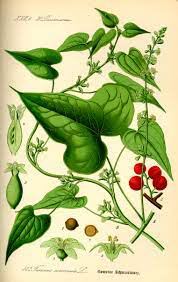




Plant Label: Ficus holosericea

Discoverer: Otto Schott

Location: Brazil



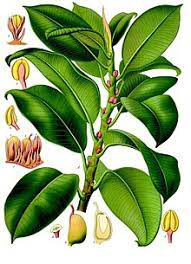




Plant Label: Hieracium wiesbaurianum subsp. niphanthodes

Discoverer: Joseph Friedrich Nicolaus Bornmüller

Location: Spain



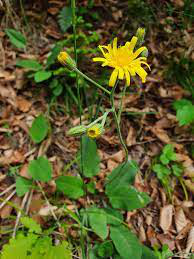




Plant Label: Ficus holosericea

Discoverer: Schott

Location: Brazil



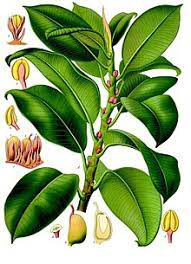




Plant Label: Hieracium wiesbaurianum subsp. niphanthodes

Discoverer: Bornmüller

Location: Spain



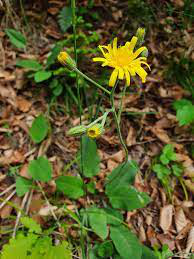




Plant Label: Asterochaete capitellata

Discoverer: Erich Oberdorfer

Location: Madagascar



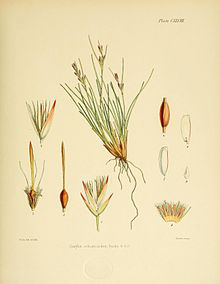




Plant Label: Asterochaete nitens

Discoverer: Louis Hyacinthe Boivin

Location: France



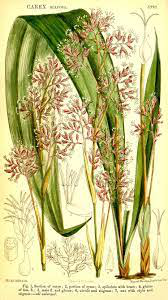




Plant Label: Asterochaete nitens

Discoverer: Boivin

Location: France



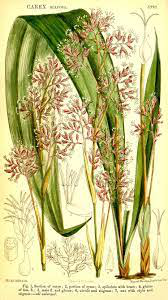

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

# VARIABLES
sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'
user_agent = 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'

# SPARQL query
query = """
SELECT ?plantLabel ?discovererLabel ?locationLabel ?image
WHERE {
  ?plant wdt:P31 wd:Q16521.
  ?plant wdt:P61 ?discoverer.
  ?plant wdt:P276 ?location.
  ?plant wdt:P18 ?image.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
LIMIT 10
"""

# SUBROUTINES
def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

# MAIN PROGRAM
sparql = SPARQLWrapper(sparql_endpoint_url, agent=user_agent)
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
result = sparql.query().convert()

for item in result['results']['bindings']:
    print('Plant Label: ' + item['plantLabel']['value'] + '\n')
    print('Discoverer: ' + item['discovererLabel']['value'] + '\n')
    print('Location: ' + item['locationLabel']['value'] + '\n')

    image_url = item['image']['value']
    headers = {'User-Agent': user_agent}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')
